# Comparison of predictions vs labels

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Setup path for saving plots
plots_dir = Path('plots')

In [141]:
df = pd.read_csv('Test_set_prediction.csv')

## Data cleaning and imputation

In [142]:
df['age'] = df['age'].astype('uint8')
df['label_0'] = df['label_0'].astype('uint8')
df['label_1'] = df['label_1'].astype('uint8')
df['label_2'] = df['label_2'].astype('uint8')
df['label_3'] = df['label_3'].astype('uint8')
df['label_4'] = df['label_4'].astype('uint8')
df['label_5'] = df['label_5'].astype('uint8')

#### Age: create age bins

Nan values are ignored

In [143]:
bins = [18, 41, 66, 95]
labels = ['18-41', '42-66', '67-95']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

Optionally, group races according to the dictionary:

In [144]:
# Read the race mapping from a JSON file
with open("race_mapping.json", "r") as outfile:
    grouped_races = json.load(outfile)

df['race'] = df['race'].map(grouped_races)

#### Race: fill NaNs with "Unknown"

In [145]:
df['race']  = df['race'].fillna("Unknown")
df['race'] = df['race'].astype('category')

#### Gender: fill NaNs with "Unknown"

In [146]:
df['gender']  = df['gender'].fillna("Unknown")
df['gender'] = df['gender'].astype('category')
print(df['gender'].unique())

['F', 'Unknown', 'M']
Categories (3, object): ['F', 'M', 'Unknown']


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   subject_id  58386 non-null  int64   
 1   age         58386 non-null  uint8   
 2   race        58386 non-null  category
 3   gender      58386 non-null  category
 4   pred_0      58386 non-null  float64 
 5   label_0     58386 non-null  uint8   
 6   pred_1      58386 non-null  float64 
 7   label_1     58386 non-null  uint8   
 8   pred_2      58386 non-null  float64 
 9   label_2     58386 non-null  uint8   
 10  pred_3      58386 non-null  float64 
 11  label_3     58386 non-null  uint8   
 12  pred_4      58386 non-null  float64 
 13  label_4     58386 non-null  uint8   
 14  pred_5      58386 non-null  float64 
 15  label_5     58386 non-null  uint8   
 16  age_group   55335 non-null  category
dtypes: category(3), float64(6), int64(1), uint8(7)
memory usage: 3.7 MB


### Calculating error

In this simple example, the error is calculated as the absolute difference of the prediction and the label.

Hence, the error is between 0 and 1.

In [148]:
pred_columns = [f"pred_{i}" for i in range(6)]
label_columns = [f"label_{i}" for i in range(6)]
error_columns = [f"error_{i}" for i in range(6)]

for i in range(6):
    df[f"error_{i}"] = np.abs(df[f"pred_{i}"] - df[f"label_{i}"])

In [149]:
df[error_columns]

,error_0,error_1,error_2,error_3,error_4,error_5
0,0.056143,0.015012,0.001175,0.004269,0.091285,0.240522
1,0.051060,0.006028,0.001799,0.006515,0.050387,0.136151
2,0.021372,0.004059,0.000743,0.004475,0.092967,0.150492
3,0.031842,0.001862,0.000797,0.006196,0.047191,0.065192
4,0.034598,0.010697,0.000503,0.005243,0.077575,0.128220
...,...,...,...,...,...,...
58381,0.104890,0.011576,0.001189,0.003390,0.057218,0.148344
58382,0.099216,0.071405,0.004492,0.001722,0.200777,0.386713
58383,0.439834,0.023786,0.000858,0.007120,0.112077,0.450677
58384,0.446967,0.284390,0.009412,0.022791,0.294759,0.150314


Create a dataframe with the error values and age group, gender, and race.

In [150]:
df_error = df[['age_group', 'gender', 'race', *error_columns]]

## Plots and preliminary conclusions

/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_1457/1185918428.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df_error.groupby('age_group')[error_columns].mean().plot(kind='bar',


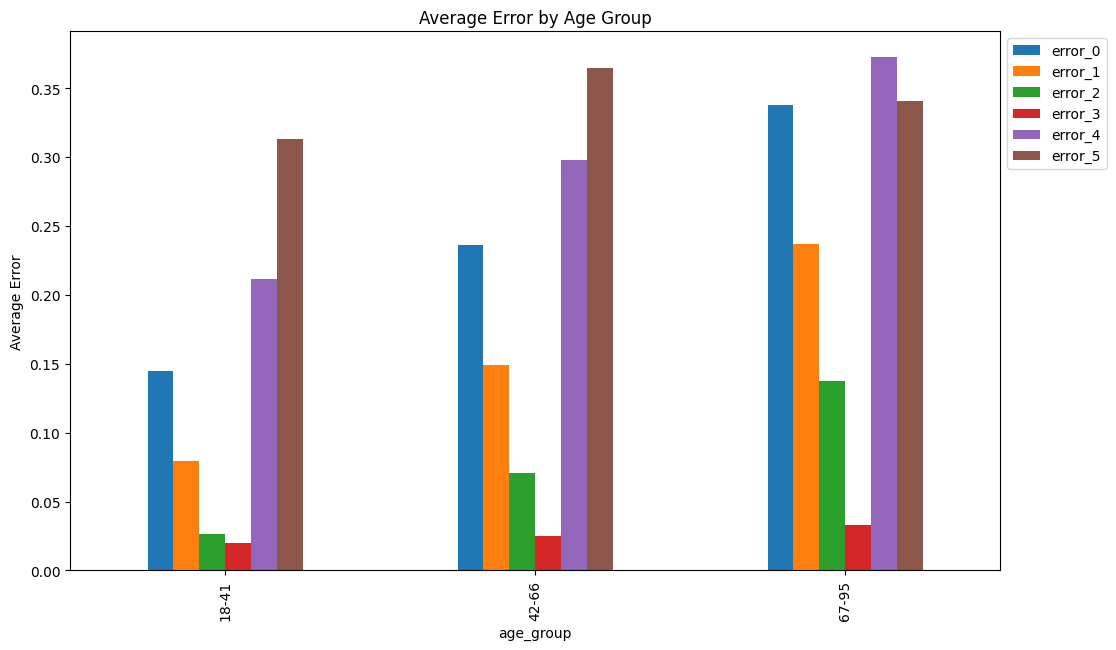

In [151]:
plot = df_error.groupby('age_group')[error_columns].mean().plot(kind='bar',
                                                          figsize=(12, 7),
                                                          title='Average Error by Age Group',
                                                          ylabel='Average Error').get_figure()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plot.savefig(plots_dir / 'average_error_by_age_group.png')

Most variability between age groups is observed for errors 0, 1, 2, and 4, while there is little variability for errors 3, and 5.

/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_1457/1203752530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df_error.groupby('race')[error_columns].mean().plot(kind='bar',


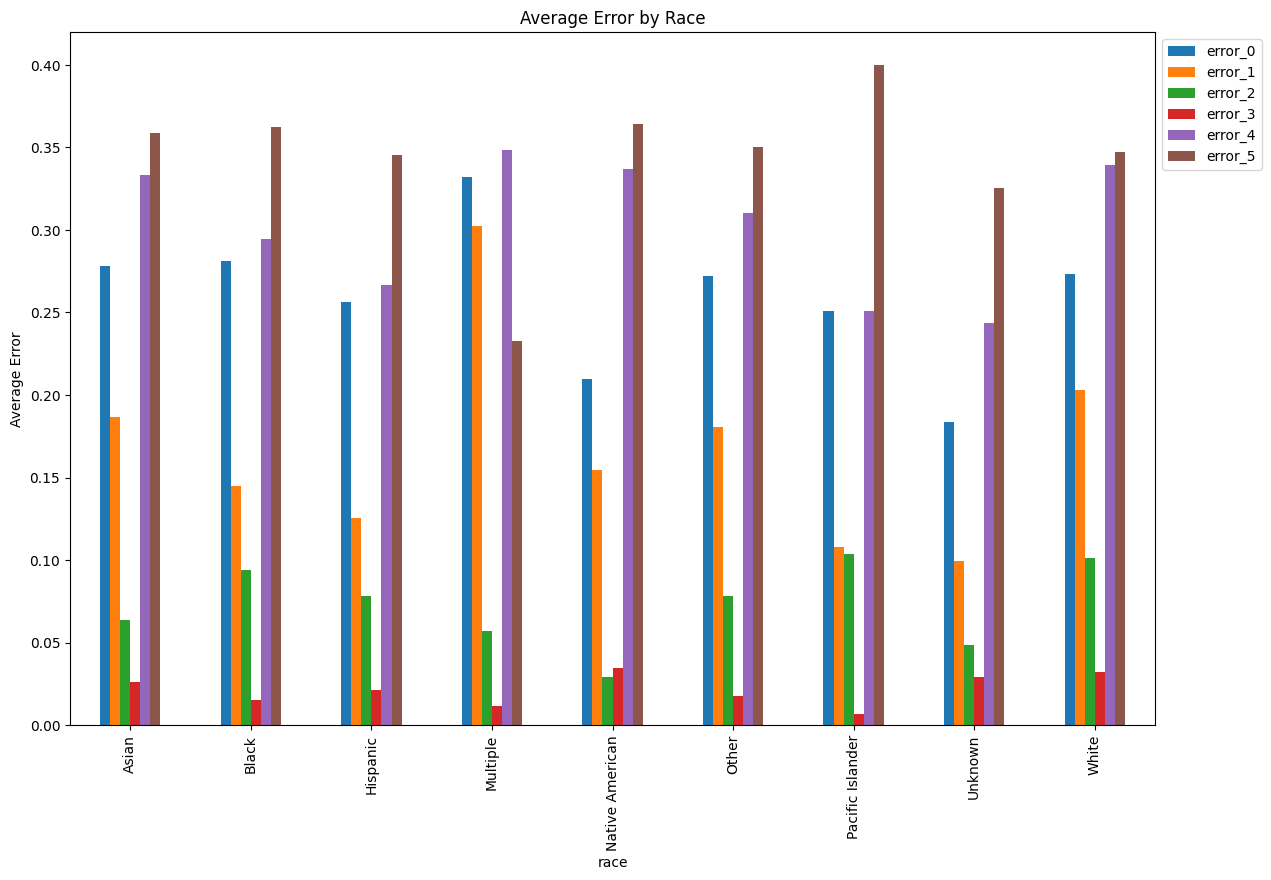

In [152]:
plot = df_error.groupby('race')[error_columns].mean().plot(kind='bar',
                                                    figsize=(14, 9),
                                                    title='Average Error by Race',
                                                    ylabel='Average Error').get_figure()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plot.savefig(plots_dir / 'average_error_by_race.png')

Between the races, there is again a high variability for errors 0, 1, and 2.

/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_1457/6299453.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df_error.groupby('gender')[error_columns].mean().plot(kind='bar',


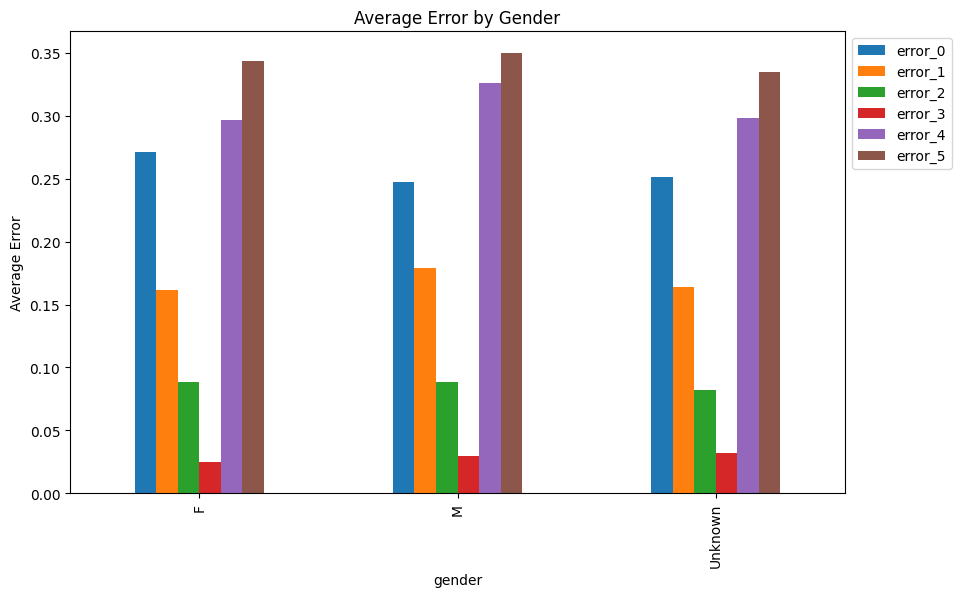

In [154]:
plot = df_error.groupby('gender')[error_columns].mean().plot(kind='bar',
                                                          figsize=(10, 6),
                                                          title='Average Error by Gender',
                                                          ylabel='Average Error').get_figure()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plot.savefig(plots_dir / 'average_error_by_gender.png')

There seems to be little variability in error when it comes to the gender attribute.